# Importation librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
sns.set(style="whitegrid")

# Data importation

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df_fraude = pd.read_csv("drive/My Drive/Datasets/Fraud_Data.csv")
df_Ipaddress = pd.read_csv("drive/My Drive/Datasets/IpAddress_to_Country.csv")

# Data exploration

In [16]:
#Voir les dimensions
print(df_fraude.shape) 

#Voir un sous echantillon des données
df_fraude.head() 

(151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [24]:
#Les informations sur les meta données
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country         151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [28]:
#Les ID dupliquees
print("ID users")
print(df_fraude['user_id'].unique())
print(len(df_fraude['user_id'].unique()))

print(" ")
print("ID device")
print(df_fraude['device_id'].unique())
print(len(df_fraude['device_id'].unique())) ##Il semble il y avoir les doublons avec les devices

ID users
[ 22058 333320   1359 ... 368416 207709 138208]
151112
 
ID device
['QVPSPJUOCKZAR' 'EOGFQPIZPYXFZ' 'YSSKYOSJHPPLJ' ... 'LYSFABUCPCGBA'
 'MEQHCSJUBRBFE' 'ZINIADFCLHYPG']
137956


In [29]:
#Voir ID device doublons
df_fraude['device_id'].value_counts()

ZUSVMDEZRBDTX    20
EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
CQTUVBYIWWWBC    20
ITUMJCKWEYNDD    20
                 ..
IRKTRRIVQPOIP     1
HIJISGRUMYNUP     1
FBJQETVHYYXJI     1
UIKKKWLUZYSNA     1
WGDEVGFPAWLLP     1
Name: device_id, Length: 137956, dtype: int64

In [17]:
print(df_Ipaddress.shape) #Voir les dimensions
df_Ipaddress.head() #Voir un sous echantillon des données

(138846, 3)


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [18]:
###Fusionner les deux dataframes
def get_country(ip, ip_country_dataset):
    """
    Return the name of the country based on the ip address
    """
    try:
        country = ip_country_dataset[
            (ip >= ip_country_dataset.lower_bound_ip_address) & (ip <= ip_country_dataset.upper_bound_ip_address)
        ]["country"].iloc[0]
    except:
        return "unknown"
    else:
        return country

df_fraude["country"] = df_fraude["ip_address"]
df_fraude["country"] = df_fraude["country"].apply(get_country, args=(df_Ipaddress,))

In [19]:
df_fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


# Univariate analysis

### Variables quantitatives

In [31]:
##Statistiques descriptives
df_fraude[['age', 'purchase_value']].describe()

,age,purchase_value
count,151112.000000,151112.000000
mean,33.140704,36.935372
std,8.617733,18.322762
min,18.000000,9.000000
25%,27.000000,22.000000
50%,33.000000,35.000000
75%,39.000000,49.000000
max,76.000000,154.000000


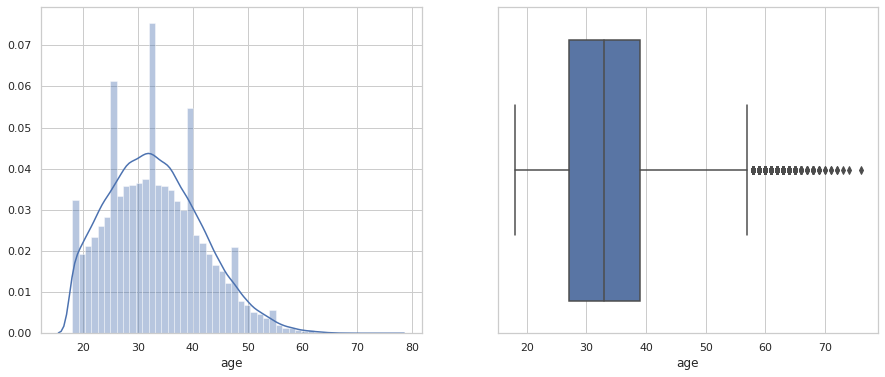

In [20]:
##Histogramme et boxplot Age
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.distplot(df_fraude.age)

plt.subplot(122)
sns.boxplot(df_fraude.age)

plt.show()

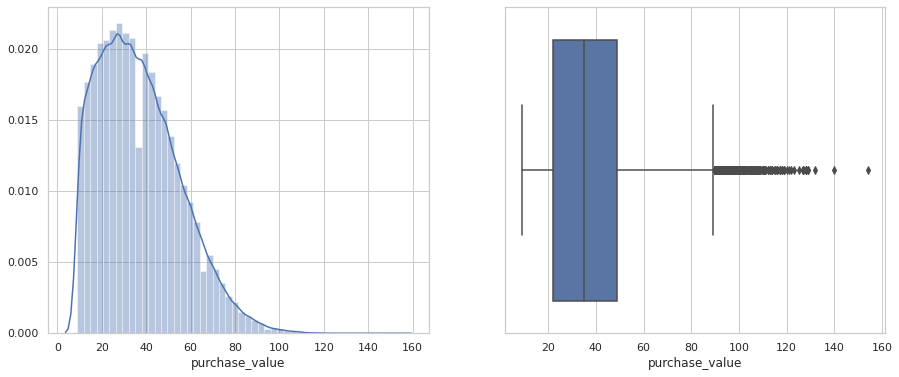

In [21]:
##Histogramme et boxplot purchase_value
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.distplot(df_fraude.purchase_value)

plt.subplot(122)
sns.boxplot(df_fraude.purchase_value)

plt.show()

## Variables qualitatives

In [22]:
print(df_fraude.columns)
df_fraude.head(2)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States


In [37]:
##Barplots pour source, sexe,  class, browser, country
var_cat1 = ['source', 'sex',  'class', 'browser', 'country']

##Voir Tableau des frequences
tab1 = np.round(100*df_fraude['source'].value_counts(normalize = True), 1)
print(tab1)
print("")
tab2 = np.round(100*df_fraude['sex'].value_counts(normalize = True), 1)
print(tab2)
print("")
tab3 = np.round(100*df_fraude['class'].value_counts(normalize = True), 1)
print(tab3)
print("")
tab4 = np.round(100*df_fraude['browser'].value_counts(normalize = True), 1)
print(tab4)
print("")
tab5 = np.round(100*df_fraude['country'].value_counts(normalize = True), 1)
print(tab5)

SEO       40.1
Ads       39.6
Direct    20.3
Name: source, dtype: float64

M    58.4
F    41.6
Name: sex, dtype: float64

0    90.6
1     9.4
Name: class, dtype: float64

Chrome     40.7
IE         24.3
Safari     16.3
FireFox    16.3
Opera       2.4
Name: browser, dtype: float64

United States                    38.4
unknown                          14.5
China                             8.0
Japan                             4.8
United Kingdom                    3.0
                                 ... 
San Marino                        0.0
Yemen                             0.0
Bonaire; Sint Eustatius; Saba     0.0
Cape Verde                        0.0
Dominica                          0.0
Name: country, Length: 182, dtype: float64


In [65]:
##Masque pour créer un groupe de pays avec une proportion < 3%
mask5 = ~df_fraude['country'].isin(['United States', 'unknown', "China", 'Japan', "United Kingdom"])

df_fraude['country_mod'] = df_fraude['country_mod'].mask(mask5, 'Others Countries')

In [67]:
tab5b = np.round(100*df_fraude['country_mod'].value_counts(normalize = True), 1)
print(tab5b)

United States       38.4
Others Countries    31.3
unknown             14.5
China                8.0
Japan                4.8
United Kingdom       3.0
Name: country_mod, dtype: float64
